In [26]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    #output=function3("this is function 3 in between")
    return input2 + " and Amar from second function" 

In [27]:
from langgraph.graph import Graph

In [28]:
#create workflow
workflow1=Graph()

In [29]:
#Add node into the workflow
workflow1.add_node("fn1", function1) #fn1 - custom name of the fn

In [30]:
#workflow 2
#Add another fn in workflow2
workflow1.add_node("fn2",function2)

In [31]:
#Adding edges - From function1 to function2
workflow1.add_edge("fn1","fn2")


In [32]:
#Create an entry point 
workflow1.set_entry_point("fn1")


In [33]:
workflow1.set_finish_point("fn2") 

In [34]:
app = workflow1.compile()

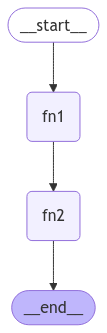

In [35]:
#Graph Visualization
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [36]:
app.invoke("Hi Iam Amarnath ")

'Hi Iam Amarnath from first function and Amar from second function'

In [39]:
input = "Hi Iam Amarnath "

In [40]:
#Stream of output
for output in app.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from fn1
_______
Hi Iam Amarnath from first function


here is output from fn2
_______
Hi Iam Amarnath from first function and Amar from second function




In [42]:
def funct3(input3):
    return input3

In [62]:
def funct1(input1):
    return input1 + "from first function"

def funct2(input2):
    output=funct3("this is function 3 in between")
    return input2 + " " + output + " and Amar from second function" 

In [63]:
from langgraph.graph import Graph

workflow2=Graph()

workflow2.add_node("fnc1", funct1)
workflow2.add_node("fnc2", funct2)

workflow2.add_edge("fnc1","fnc2")


In [64]:
workflow2.set_entry_point("fnc1")

In [65]:
workflow2.set_finish_point("fnc2")

In [66]:
app1=workflow2.compile()

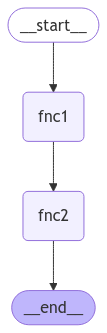

In [67]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [68]:
app1.invoke("hi this is Amarnath D ")



'hi this is Amarnath D from first function this is function 3 in between and Amar from second function'

In [71]:
input = "AMARNATH "

In [72]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from fnc1
_______
AMARNATH from first function


here is output from fnc2
_______
AMARNATH from first function this is function 3 in between and Amar from second function




In [73]:
 #Let's create a workflow with LLM
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
llm.invoke("hi").content

c:\Users\Toshiba\anaconda3\envs\langgraphe2e\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'Hello there! How can I assist you today?'

In [74]:
def func_1(input):
    llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
    response=llm.invoke(input).content
    return response

In [75]:
def func_2(input):
    upper_case=input.upper()
    return upper_case

In [76]:
from langgraph.graph import Graph
workflow3=Graph()

In [77]:
workflow3.add_node("llm_fn1",func_1)

In [78]:
workflow3.add_node("upper_cast_fn2",func_2)

In [79]:
workflow3.add_edge("llm_fn1","upper_cast_fn2")

In [80]:
workflow3.set_entry_point("llm_fn1")
workflow3.set_finish_point("upper_cast_fn2")

In [81]:
app2 = workflow3.compile()

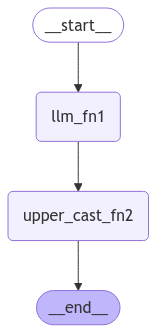

In [82]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [84]:
app2.invoke("Roger Federer is famous for?")

'TENNIS'

In [85]:
app2.invoke("who is Roger Federer , give a glimpse about him?")

"**ROGER FEDERER**\n\n**BIRTH DATE:** AUGUST 8, 1981\n**BIRTH PLACE:** BASEL, SWITZERLAND\n**HEIGHT:** 6 FT 1 IN (1.85 M)\n**WEIGHT:** 187 LB (85 KG)\n**HANDEDNESS:** RIGHT-HANDED (TWO-HANDED BACKHAND)\n\n**TENNIS CAREER:**\n\nROGER FEDERER IS A SWISS PROFESSIONAL TENNIS PLAYER WHO IS WIDELY CONSIDERED ONE OF THE GREATEST TENNIS PLAYERS OF ALL TIME. HE HAS WON 20 GRAND SLAM SINGLES TITLES, THE MOST BY ANY MALE PLAYER IN HISTORY.\n\nFEDERER BEGAN PLAYING TENNIS AT THE AGE OF SIX AND TURNED PROFESSIONAL IN 1998. HE QUICKLY ROSE THROUGH THE RANKS AND WON HIS FIRST GRAND SLAM TITLE, WIMBLEDON, IN 2003. HE WENT ON TO WIN FIVE CONSECUTIVE WIMBLEDON TITLES (2003-2007) AND FOUR CONSECUTIVE US OPEN TITLES (2004-2007).\n\nIN ADDITION TO HIS GRAND SLAM SUCCESS, FEDERER HAS WON A RECORD 103 ATP SINGLES TITLES AND SPENT A TOTAL OF 237 CONSECUTIVE WEEKS AS THE WORLD'S NO. 1 RANKED PLAYER. HE HAS ALSO WON 8 DOUBLES TITLES, INCLUDING 2 AUSTRALIAN OPEN TITLES WITH HIS LONG-TIME DOUBLES PARTNER, MIRKA V

In [86]:
print(app2.invoke("who is Roger Federer , give a glimpse about him?"))

**ROGER FEDERER**

**BORN:** AUGUST 8, 1981, BASEL, SWITZERLAND

**NATIONALITY:** SWISS

**SPORT:** TENNIS

**CAREER HIGHLIGHTS:**

* **20 GRAND SLAM SINGLES TITLES:** (8 WIMBLEDON, 6 AUSTRALIAN OPEN, 5 US OPEN, 1 FRENCH OPEN)
* **310 WEEKS AS WORLD NUMBER ONE:** (RECORD)
* **103 ATP SINGLES TITLES:** (FOURTH-MOST ALL-TIME)
* **6 ATP FINALS TITLES:** (RECORD)
* **19 ATP MASTERS 1000 TITLES:** (SECOND-MOST ALL-TIME)
* **OLYMPIC GOLD MEDAL:** (DOUBLES IN 2008)
* **DAVIS CUP CHAMPION:** (2014)
* **LAUREUS WORLD SPORTSMAN OF THE YEAR:** (5 TIMES)

**PLAYING STYLE:**

* KNOWN FOR HIS ELEGANT AND EFFORTLESS PLAYING STYLE
* EXCEPTIONAL SERVE-AND-VOLLEY SKILLS
* PRECISE AND POWERFUL GROUNDSTROKES
* EXCELLENT FOOTWORK AND COURT COVERAGE

**PERSONALITY AND IMPACT:**

* WIDELY REGARDED AS ONE OF THE GREATEST TENNIS PLAYERS OF ALL TIME
* KNOWN FOR HIS SPORTSMANSHIP AND HUMILITY
* HAS INSPIRED COUNTLESS YOUNG PLAYERS AND FANS
* HAS BEEN A GLOBAL AMBASSADOR FOR THE SPORT OF TENNIS

**CAREER OVERVIEW

In [87]:
 #Stream of output

que = "who is Roger Federer , give a glimpse about him?"


In [89]:
for output in app2.stream(que):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm_fn1
_______
**Roger Federer** is a Swiss former professional tennis player. Widely considered to be one of the greatest tennis players of all time, Federer holds the record for the most Grand Slam men's singles titles (20) and has been ranked world No. 1 for a record 237 consecutive weeks.

**Early Life and Career:**

* Born on August 8, 1981, in Basel, Switzerland
* Began playing tennis at age six
* Turned professional in 1998 at age 16

**Major Achievements:**

* Won 20 Grand Slam singles titles (8 Wimbledon, 6 Australian Open, 5 US Open, 1 French Open)
* Held the world No. 1 ranking for a record 237 consecutive weeks (2004-2008, 2009-2010, 2012, 2014-2016, 2017-2018)
* Won 103 ATP Tour singles titles
* Won a record eight Wimbledon singles titles
* Won the ATP Finals six times
* Won the Davis Cup with Switzerland in 2014

**Playing Style:**

* Known for his elegant and attacking style of play
* Possesses an all-court game with exceptional footwork and shot-mak

In [90]:
#Let's create an own output token counter

def func_3(user_input):
    token=user_input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number



In [91]:
workflow4=Graph()
workflow4.add_node("llm_fnc",func_1)
workflow4.add_node("token_counter_fnc",func_3)
workflow4.add_edge("llm_fnc","token_counter_fnc")
workflow4.set_entry_point("llm_fnc")
workflow4.set_finish_point("token_counter_fnc")
app3=workflow4.compile()

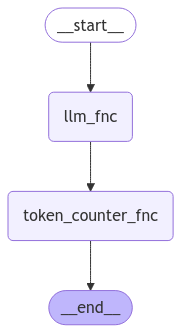

In [92]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [95]:
app3.invoke("who won the T20 men world cup in 2007?")

'total token number is 1'

In [96]:
app3.invoke("Explain Agentic AI in short?")

'total token number is 109'